In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import random

In [117]:
X_train = np.loadtxt('train_X.csv', delimiter = ',').T
y_train = np.loadtxt('train_label.csv', delimiter = ',').T
X_test = np.loadtxt('test_X.csv', delimiter = ',').T
y_test = np.loTopics (separate with spaces)adtxt('test_label.csv', delimiter = ',').T

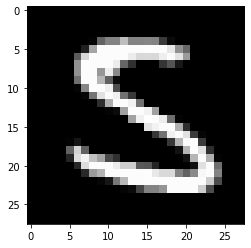

In [118]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28, 28), cmap = 'grey')
plt.show()

In [50]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [51]:
def derivative_tanh(x):
    return(1 - np.power(x,2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [52]:
#Initialize paarameters 

def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters
    

In [61]:
#forward propogation 

def forward_propogation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1, 
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

In [71]:
#cost function 
def cost_function(a2, y):
    
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    return cost

In [88]:
#backward propogation

def backward_propagation(x, y, parameters, forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2, 
        "db2" : db2
    }
    
    return gradients

In [89]:
#update parameters 
def update_parameters(parameters, gradients, learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2'] 
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
        
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters  

In [102]:
#complete model 

def model(x, y, n_h, learning_rate, iterations):
    n_x = x.shape[0]
    n_y = y.shape[0]

    parameters = initialize_parameters(n_x, n_h, n_y)
    
    cost_list = []
    
    for i in range(iterations):
        
        forward_cache = forward_propogation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_propagation(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, " iterations is: ", cost)
            
    return parameters, cost_list

In [103]:
iterations = 100
n_h = 1000
learning_rate = 0.002
parameters, cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

cost after  0  iterations is:  7.825068283383142
cost after  10  iterations is:  42.1375243419903
cost after  20  iterations is:  3.5768133481151265
cost after  30  iterations is:  1.4163510075189691
cost after  40  iterations is:  0.40827017417659023
cost after  50  iterations is:  0.2575975386644915
cost after  60  iterations is:  0.22685150904365275
cost after  70  iterations is:  1.5909667218610601
cost after  80  iterations is:  0.09697775170403933
cost after  90  iterations is:  0.052836786223458845


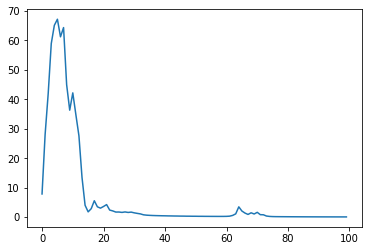

In [104]:
t = np.arange(0, iterations)
plt.plot(t, cost_list)
plt.show()

In [122]:
def accuracy(inp, labels, parameters):
    forwardCache = forward_propogation(inp, parameters)
    a_out = forwardCache['a2']
    a_out = np.argmax(a_out, 0)
    y_out = np.argmax(labels, 0)

    accuracy = np.mean(a_out == y_out)*100
    
    return accuracy

In [123]:
print("Accuracy of the training dataset: ", accuracy(X_train, y_train, parameters))
print("Accuracy of the training dataset: ", accuracy(X_test, y_test, parameters))

Accuracy of the training dataset:  99.7
Accuracy of the training dataset:  87.14285714285714


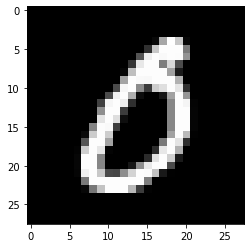

Our model says it is:  [0]


In [132]:
idx = random.randrange(0, X_test.shape[1])
plt.imshow(X_test[:, idx].reshape(28, 28), cmap = 'grey')
plt.show()

forwardCache = forward_propogation(X_test[:, idx].reshape(X_test.shape[0], 1), parameters)
a_out = forwardCache['a2']
a_out = np.argmax(a_out, 0)
print("Our model says it is: ", a_out)